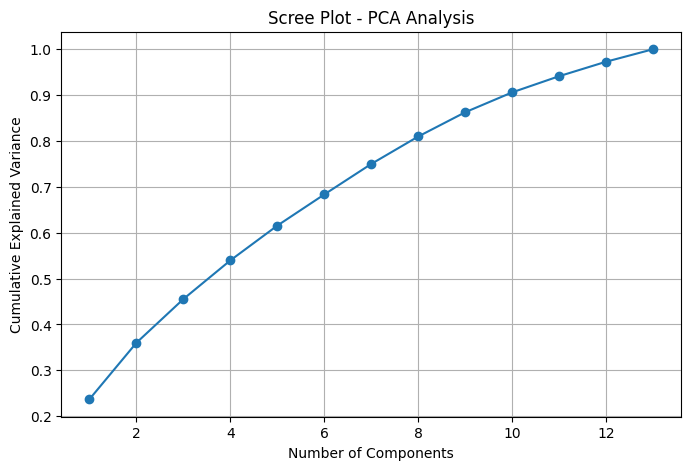

📊 نسبة التباين التراكمي لكل Component:
Component 1: 0.2369
Component 2: 0.3599
Component 3: 0.4553
Component 4: 0.5396
Component 5: 0.6154
Component 6: 0.6834
Component 7: 0.7499
Component 8: 0.8097
Component 9: 0.8626
Component 10: 0.9059
Component 11: 0.9412
Component 12: 0.9728
Component 13: 1.0000

✅ عدد Components كافي لتفسير 90% من التباين: 10


In [1]:
# ===== Step 2.5: PCA Analysis =====
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# تحميل الداتا النظيفة
df = pd.read_csv("/content/heart_disease_clean.csv")
X = df.drop('target', axis=1)

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# نسبة التباين
explained_variance = pca.explained_variance_ratio_
cum_var = explained_variance.cumsum()

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot - PCA Analysis")
plt.grid()
plt.show()

print("📊 نسبة التباين التراكمي لكل Component:")
for i, var in enumerate(cum_var, start=1):
    print(f"Component {i}: {var:.4f}")

# ممكن نختار عدد components اللي يفسر 90-95% من التباين
n_components_90 = (cum_var < 0.90).sum() + 1
print(f"\n✅ عدد Components كافي لتفسير 90% من التباين: {n_components_90}")
